## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#merge data frames into one dataframe
smoosh_df =  pd.merge(mouse_metadata, study_results, on=('Mouse ID'))
smoosh_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#finding duplicates
dupes = smoosh_df.duplicated(subset=["Mouse ID", "Timepoint"])
dupes
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
smoosh_df['Dupes'] = smoosh_df.duplicated(subset=["Mouse ID", "Timepoint"])
# Optional: Display all the data for the duplicate mouse ID, thank you Lauren for making my code cleaner. 
dupes = smoosh_df.loc[(smoosh_df["Dupes"] ==True)]
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupes
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
#the duplicates
the_dupe_df = smoosh_df.loc[(smoosh_df["Mouse ID"] =="g989")]
the_dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupes
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
#duplicates removed
clean_df = smoosh_df.loc[(smoosh_df["Mouse ID"]!="g989")].drop("Dupes", axis=1)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped = clean_df.groupby("Drug Regimen")
#grouped.head() to make sure group by worked
tum_mean = grouped["Tumor Volume (mm3)"].mean()
tum_med = grouped["Tumor Volume (mm3)"].median()
tum_std = grouped["Tumor Volume (mm3)"].std()
tum_sem = grouped["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
grouped = pd.DataFrame({"Mean" : tum_mean, "Median": tum_med, 
                        "Standard Deviation": tum_std, "SEM": tum_sem})
grouped.head(10)

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
small_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].head()
small_df.agg(
    ({"Tumor Volume (mm3)": ['mean', 'median', 'std', 'sem']}))

,Tumor Volume (mm3)
mean,37.212378
median,35.014271
std,4.867646
sem,2.176877


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

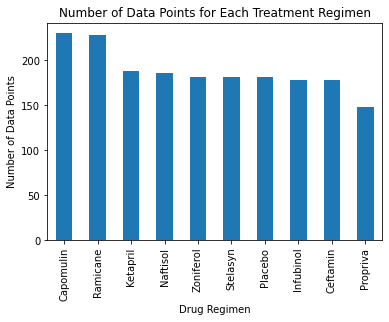

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.5)
#making the graph nicer
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

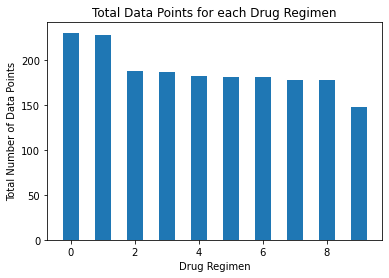

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug regimen count
drug_count = clean_df["Drug Regimen"].value_counts()
drug_count

#set x axis to drug count
xaxis = np.arange(len(drug_count))
plt.bar(xaxis, drug_count, width =0.5)
plt.title("Total Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Data Points")
plt.show()


Sex
Female    123
Male      125
Name: , dtype: int64

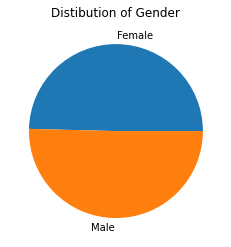

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#went over this in office hours
gen_num = clean_df.groupby(["Sex"])
gen_count = gen_num["Mouse ID"].nunique()
gen_count.name = ""
gen_count.plot(kind = 'pie', title=("Distibution of Gender"))
gen_count

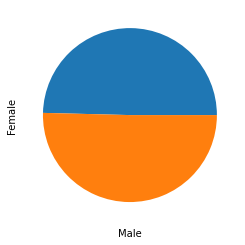

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#also discussed in office hours
plt.pie(gen_count)
plt.xlabel('Male')
plt.ylabel('Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin, did not see this line the first time

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time
max_time['Max Time']= clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, max_time, on='Mouse ID').rename(columns={"Timepoint_x" : "Timepoint", 
                                                                       "Timepoint_y" : "Max Timepoint"})
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [13]:
# Put treatments into a list for a for loop (and later for plot labels),
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. Thanks AskBCS
for drug in drug_list:
    loop_df = merge_df.loc[merge_df['Drug Regimen'] == drug]
#need to narrow down to max time point in order to find the final tumor size
    final_size = loop_df.loc[loop_df['Timepoint'] == loop_df['Max Timepoint']]
#append final size to df
    size = final_size['Tumor Volume (mm3)']
    tumor_data.append(size)
#IQR information    
    quartiles = size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq= quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug} the IQR is {iqr}')
# Define lower and upper quartiles 
    lower = lowerq - (1.5*iqr)
    upper = upperq + (1.5*iqr)   
# Determine outliers using upper and lower bounds
    outliers = (size.loc[(final_size['Tumor Volume (mm3)'] >= upper)|
                       final_size['Tumor Volume (mm3)'] <= lower]).count()
    print(f'Number of outliers for {drug} is {outliers}')

For Capomulin the IQR is 7.781863460000004
Number of outliers for Capomulin is 25
For Ramicane the IQR is 9.098536719999998
Number of outliers for Ramicane is 25
For Infubinol the IQR is 11.477135160000003
Number of outliers for Infubinol is 25
For Ceftamin the IQR is 15.577752179999997
Number of outliers for Ceftamin is 25


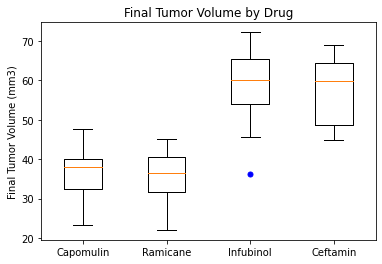

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest, thank you AskBCS/stackeoverflow
details = dict(marker='o', markerfacecolor='b', markersize=5, markeredgecolor='b')
plt.boxplot(tumor_data, flierprops=details)
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Time')

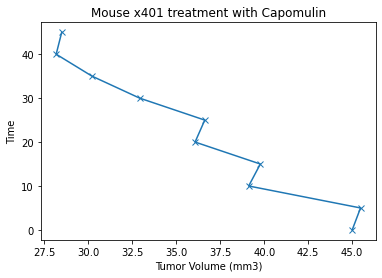

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin, 
#pulled mouse ID by looking at data file
lab_rat = clean_df.loc[clean_df["Mouse ID"] == 'x401']
plt.plot(lab_rat["Tumor Volume (mm3)"], lab_rat["Timepoint"], marker = 'x')
plt.title("Mouse x401 treatment with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time")



<function matplotlib.pyplot.show(*args, **kw)>

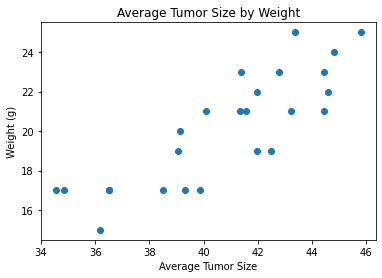

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#pulling only Capomulin data
capomulin_info = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
#Average tumor size for each mouse
ave_tum = capomulin_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
ave_tum
ave_tum['Average Tumor Size'] = capomulin_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
ave_tum
#merge this with exsisting dataframe
combo_df = pd.merge(capomulin_info, ave_tum, on='Mouse ID').rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3)",
                                                                           "Tumor Volume (mm3)_y": "Average Tumor Size"})
combo_df
#drop duplicates
drop = combo_df[["Weight (g)", "Average Tumor Size"]].drop_duplicates()
drop

#make scatter plot
x = drop["Average Tumor Size"]
y = drop["Weight (g)"]
plt.scatter(x,y)
plt.title("Average Tumor Size by Weight")
plt.xlabel("Average Tumor Size")
plt.ylabel("Weight (g)")
plt.show

## Correlation and Regression

"The correlation between average tumor size and weight is (0.8419363424694718, 1.3225722434712687e-07)"


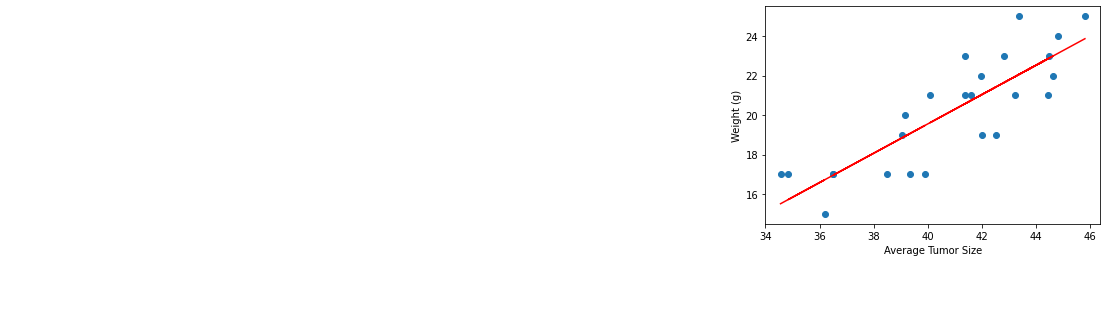

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#copy data down
capomulin_info = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
#Average tumor size for each mouse
ave_tum = capomulin_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
ave_tum
ave_tum['Average Tumor Size'] = capomulin_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
ave_tum
#merge this with exsisting dataframe
combo_df = pd.merge(capomulin_info, ave_tum, on='Mouse ID').rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3)",
                                                                           "Tumor Volume (mm3)_y": "Average Tumor Size"})
combo_df
#drop duplicates
drop = combo_df[["Weight (g)", "Average Tumor Size"]].drop_duplicates()
drop
x = drop["Average Tumor Size"]
y = drop["Weight (g)"]
#correlation formula
corr= st.pearsonr(x,y)
print(f'"The correlation between average tumor size and weight is {corr}"')
#linear regressing (slope, intercept, mx+y =b)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x.astype(float),y)
regress_val = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_val,"r-")
plt.annotate(line,(6,10),fontsize=15,color='r')
plt.xlabel("Average Tumor Size")
plt.ylabel("Weight (g)")
plt.show()